In [1]:
import torch

In [ ]:
#1. triangle free code
#2. local search julia code
#3. transformer training code
#4. assemble everything in one loop
#5. add logging add beautify

In [1]:
from triangle_free import *

## Initializations: seed, device

## Initial dataset creation

In [27]:
N = 20
empty = empty_starting_point(N)

In [29]:
test = greedy_search_from_startpoint(None, empty, N)

In [9]:
def string_to_adjmat(obj, N):
    # Create an empty adjacency matrix
    adjmat = np.zeros((N, N), dtype=int)
    
    # Fill the upper triangular matrix from the input string `obj`
    index = 0
    for i in range(N - 1):
        for j in range(i + 1, N):
            # Convert the current character to an integer (0 or 1)
            value = int(obj[index])
            adjmat[i, j] = value
            adjmat[j, i] = value  # Ensure the matrix is symmetric
            index += 1
    return adjmat

In [30]:
test_mat = print(string_to_adjmat(test, N))

[[0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0]
 [0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0]
 [0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1]
 [0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1]
 [0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0]
 [1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1]
 [0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0]]


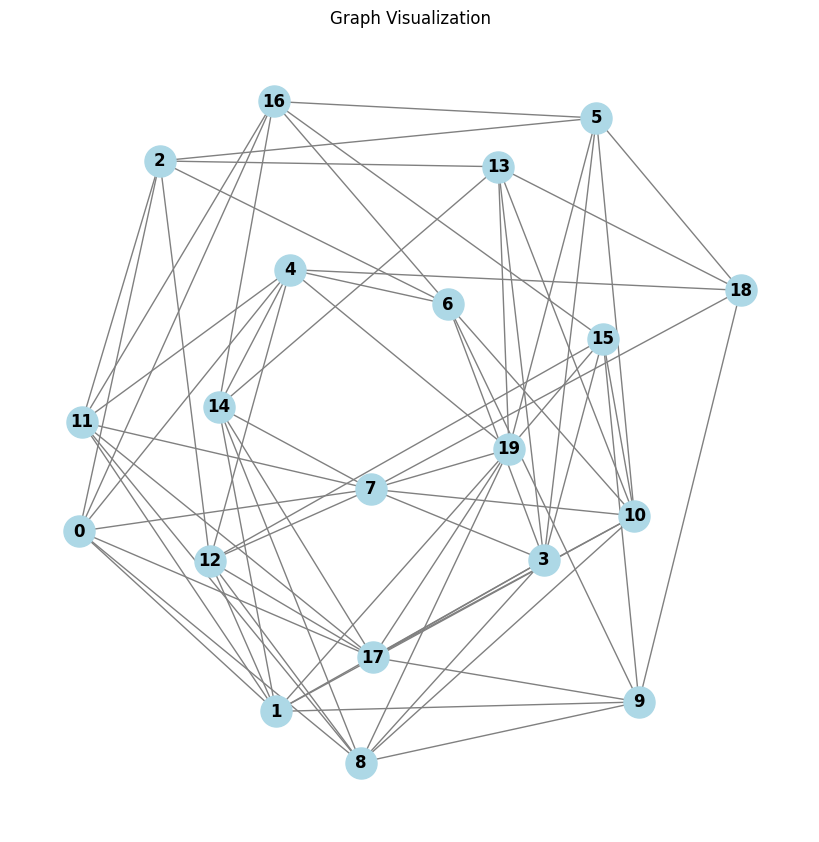

In [31]:
import networkx as nx

import matplotlib.pyplot as plt

# Create adjacency matrix from the test string
adj_matrix = string_to_adjmat(greedy_search_from_startpoint(None, empty, N), N)

# Create graph from adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Set up the plot
plt.figure(figsize=(8, 8))

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, 
    node_color='lightblue',
    node_size=500,
    with_labels=True,
    font_size=12,
    font_weight='bold',
    edge_color='gray')

plt.title('Graph Visualization')
plt.show()

In [16]:
from tqdm.notebook import tqdm

In [32]:
from multiprocessing import Pool
import os

NN = int(4e5)
empty = empty_starting_point(N)

def worker(_):
    return greedy_search_from_startpoint(None, empty, N)

with Pool(processes=os.cpu_count()) as pool:
    dataset = list(tqdm(pool.imap_unordered(worker, range(NN)), total=NN))


Processing:   0%|          | 0/400000 [00:00<?, ?it/s]

In [41]:
import pickle
import os

# Create data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Save relevant data
data_to_save = {
    'dataset': dataset,
    'rewards': rewards,
    'N': N,
    'empty': empty,
    'max_reward_graph': max_reward_graph,
    'max_reward': max_reward
}

# Save to file
with open('data/dataset.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)

print(f"Dataset saved to data/dataset.pkl")

Dataset saved to data/dataset.pkl


In [ ]:
def reward_calc(obj, N):
    """
    Calculates the reward of a construction.
    For example, counts the number of edges (i.e. '1's) in the string representation.
    """
    ## differs from paper, there it is num of edges - 2 * num of triangles
    #return obj.count('1')
    edges = obj.count('1')
    triangles = len(find_all_triangles(string_to_adjmat(obj, N)))
    return edges - 2 * triangles

In [23]:
def reward_calc_ones(obj, N):
    return obj.count('1')

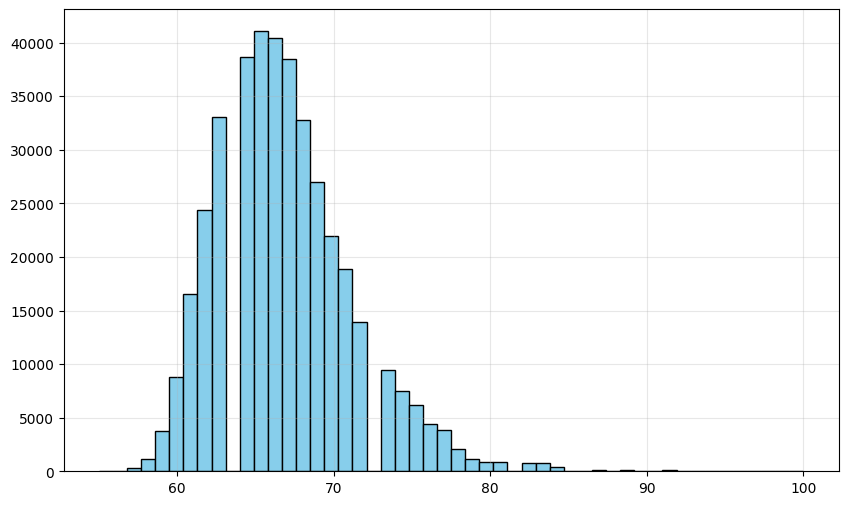

In [34]:
rewards = [reward_calc_ones(obj, N) for obj in dataset]
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=50, color='skyblue', edgecolor='black')
plt.grid(True, alpha=0.3)
plt.show()

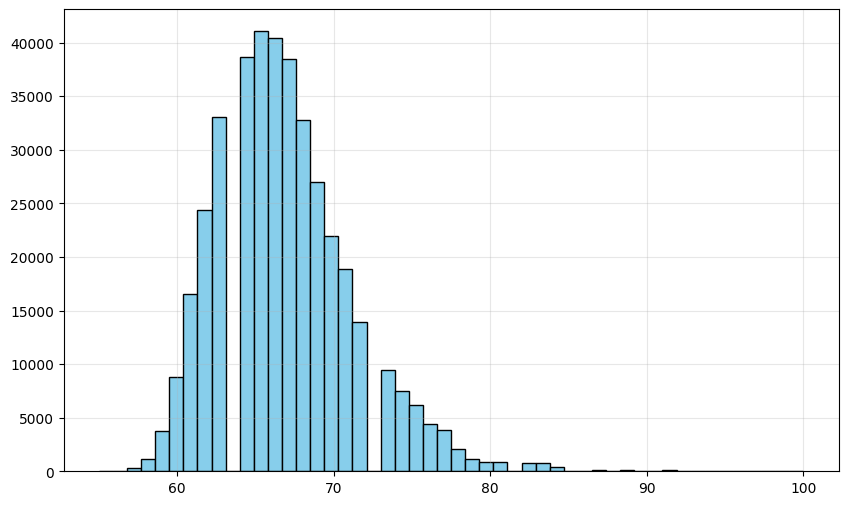

In [35]:
rewards = [reward_calc(obj, N) for obj in dataset]
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=50, color='skyblue', edgecolor='black')
plt.grid(True, alpha=0.3)
plt.show()

In [36]:
# Sort dataset entries by their corresponding rewards and get indices
sorted_indices = sorted(range(len(rewards)), key=lambda k: rewards[k], reverse=True)

# Calculate how many entries make up 25%
n_entries = len(dataset) // 4

# Get the top 25% of dataset
top_25_indices = sorted_indices[:n_entries]
top_25_dataset = [dataset[i] for i in top_25_indices]

print(f"Original dataset size: {len(dataset)}")
print(f"Top 25% dataset size: {len(top_25_dataset)}")
print(f"Average reward in original dataset: {sum(rewards)/len(rewards):.2f}")
print(f"Average reward in top 25% dataset: {sum(rewards[i] for i in top_25_indices)/n_entries:.2f}")

Original dataset size: 400000
Top 25% dataset size: 100000
Average reward in original dataset: 66.85
Average reward in top 25% dataset: 72.64


Maximum reward: 100
Index in dataset: 23178


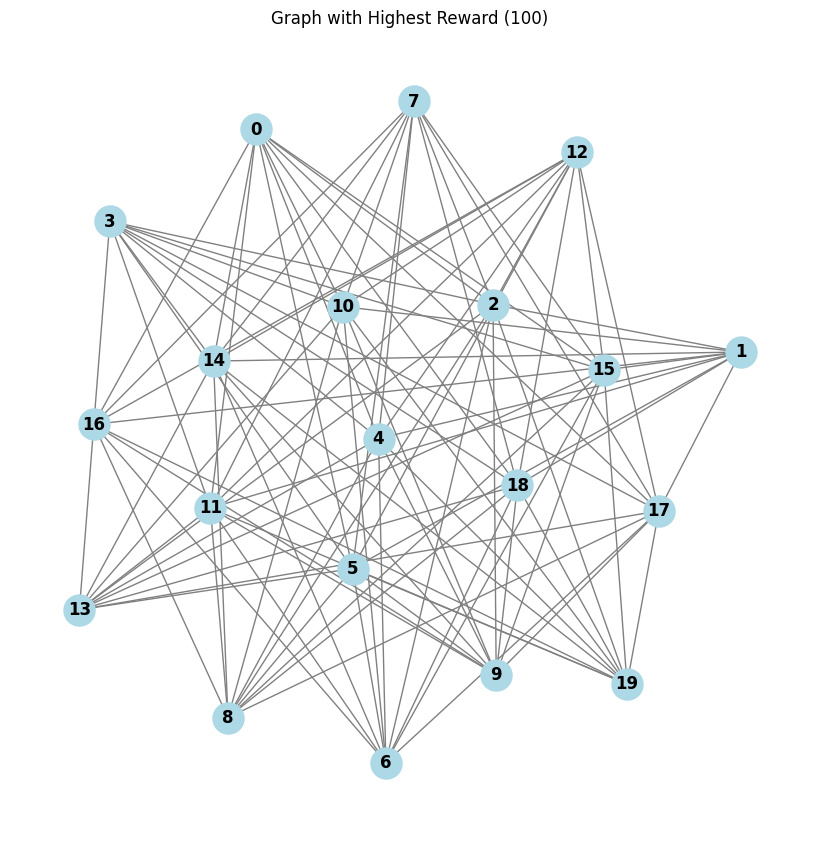

In [37]:
# Get the index of the highest reward entry
max_reward_idx = sorted_indices[0]

# Get the highest reward
max_reward = rewards[max_reward_idx]

# Get the corresponding graph string
max_reward_graph = dataset[max_reward_idx]

print(f"Maximum reward: {max_reward}")
print(f"Index in dataset: {max_reward_idx}")

# Convert the string representation to adjacency matrix for visualization
max_reward_matrix = string_to_adjmat(max_reward_graph, N)

# Create and visualize the graph
plt.figure(figsize=(8, 8))
max_G = nx.from_numpy_array(max_reward_matrix)
pos = nx.spring_layout(max_G)
nx.draw(max_G, pos,
    node_color='lightblue',
    node_size=500,
    with_labels=True,
    font_size=12,
    font_weight='bold',
    edge_color='gray')

plt.title(f'Graph with Highest Reward ({max_reward})')
plt.show()

## Train the tokenizer on the initial dataset

##### for now we will not include row separators

In [38]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

In [39]:
N_TOKENS = 100

In [40]:
tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = Whitespace()
trainer = BpeTrainer(vocab_size=N_TOKENS)

In [ ]:
tokenizer.train_from_iterator(dataset, trainer=trainer, length=len(dataset))

In [43]:
tokenizer.save('data/tokenizer.json')

In [44]:
from datasets import Dataset

In [48]:
dataset_HF = Dataset.from_list([{"text": text} for text in top_25_dataset])

In [52]:
tokenizer

Tokenizer(version="1.0", truncation=None, padding=None, added_tokens=[], normalizer=None, pre_tokenizer=Whitespace(), post_processor=None, decoder=None, model=BPE(dropout=None, unk_token=None, continuing_subword_prefix=None, end_of_word_suffix=None, fuse_unk=False, byte_fallback=False, ignore_merges=False, vocab={"0":0, "1":1, "00":2, "100":3, "10":4, "10000":5, "1000":6, "11":7, "1000000":8, "110":9, "100000":10, "1010":11, "1100":12, "11000":13, "10100":14, "100000000":15, "110000":16, "10000000":17, "100100":18, "101000":19, "1011":20, "1100000":21, "10110":22, "1010000":23, "10011":24, "1001000":25, "11000000":26, "10000000000":27, "101100":28, "100110":29, "111000":30, "10100000":31, "1000000000":32, "10010000":33, "1011000":34, "100011":35, "0000":36, "110000000":37, "1001010":38, "1001100":39, "10001000":40, "1110000":41, "101000000":42, "1101000":43, "10110000":44, "11100":45, "1000110":46, "100100000":47, "1111":48, "10010100":49, "10011000":50, "11110":51, "1100000000":52, "1

In [ ]:
# Updated cell in train_translation_model.ipynb
def preprocess_function(batch):
    # 'batch' is a dict with columns as keys
    inputs = [entry for entry in batch['text']]

    model_inputs = tokenizer(
        inputs,
        return_tensors='pt'
    )
    
    return model_inputs

In [51]:
tokenized_dataset = dataset_HF.map(preprocess_function, batched=True)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

TypeError: 'tokenizers.Tokenizer' object is not callable

## Train a model on the initial dataset

In [ ]:
##seed, device and logging method

###

# init datasets
for i in range(1,args.max_epochs):
    if not os.path.isfile(f"{args.dump_path}/search_output_{i}-tokenized.txt"):
        break
initial_gen = i-1
if initial_gen == 0:
    os.environ["JULIA_NUM_THREADS"] = str(args.nb_threads)  # Set the environment variable
    logger.info(f"JULIA_NUM_THREADS is set to {os.environ['JULIA_NUM_THREADS']}")
    subprocess.run(["julia","search_fc.jl", args.dump_path, str(args.nb_local_searches), str(args.num_initial_empty_objects), str(args.final_database_size), str(args.target_db_size)])
    tokenize(f"{args.dump_path}/search_output_1.txt", args.n_tokens)
    initial_gen = 1

logger.info(f"initializing at generation: {initial_gen}")
input_file = args.dump_path + f"/search_output_{initial_gen}-tokenized.txt"
train_dataset, test_dataset = create_datasets(input_file)
vocab_size = args.n_tokens + 1
block_size = args.max_output_length + 1
logger.info(f"dataset determined that: {vocab_size=}, {block_size=}")

# init model
config = ModelConfig(vocab_size=vocab_size, block_size=block_size,
                    n_layer=args.n_layer, n_head=args.n_head,
                    n_embd=args.n_embd, n_embd2=args.n_embd2)
if args.type == 'transformer':
    model = Transformer(config)
elif args.type == 'bigram':
    model = Bigram(config)
elif args.type == 'mlp':
    model = MLP(config)
elif args.type == 'rnn':
    model = RNN(config, cell_type='rnn')
elif args.type == 'gru':
    model = RNN(config, cell_type='gru')
elif args.type == 'bow':
    model = BoW(config)
else:
    logger.error(f'model type {args.type} is not recognized')
model.to(args.device)
logger.info(f"model #params: {sum(p.numel() for p in model.parameters())}")
model_path = os.path.join(args.dump_path, "model.pt")
if os.path.isfile(model_path): # Note: if we sample-only then we also assume we are resuming
    logger.info("resuming from existing model")
    model.load_state_dict(torch.load(model_path))


for generation in range(initial_gen,args.max_epochs + 1):
    logger.info(f"============ Start of generation {generation} ============")
    logger.info(f"Memory allocated:  {torch.cuda.memory_allocated(0)/(1024*1024):.2f}MB, reserved: {torch.cuda.memory_reserved(0)/(1024*1024):.2f}MB")

    logger.info("training")
    # python makemoretokens.py --i search_output_1-tokenized.txt --device cuda
    #train_makemore()
    # init optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay, betas=(0.9, 0.99), eps=1e-8)

    # init dataloader
    batch_loader = InfiniteDataLoader(train_dataset, batch_size=args.batch_size, pin_memory=True, num_workers=args.num_workers)

    # training loop
    best_loss = None
    step = 0
    while True:

        t0 = time.time()

        # get the next batch, ship to device, and unpack it to input and target
        batch = batch_loader.next()
        batch = [t.to(args.device) for t in batch]
        X, Y = batch

        # feed into the model
        try:
            logits, loss = model(X, Y)
            # calculate the gradient, update the weights
            model.zero_grad(set_to_none=True)
            loss.backward()
            optimizer.step()

        except RuntimeError as e:
            logger.info("Caught RuntimeError during forward pass.")
            logger.info(f"Shape of x before error: {X.shape}")
            logger.info(f"Shape of y before error: {Y.shape}")
            logger.info(f"Shape of logits (if calculated): {logits.shape if 'logits' in locals() else 'Not calculated'}")

            #raise e

        

        # wait for all CUDA work on the GPU to finish then calculate iteration time taken
        if args.device =="cuda":
            torch.cuda.synchronize()
        t1 = time.time()

        # logging
        if step % 100 == 0:
            logger.info(f"step {step} | loss {loss.item():.4f} | step time {(t1-t0)*1000:.2f}ms")

        # evaluate the model
        if step > 0 and step % 500 == 0:
            train_loss = evaluate(model, train_dataset, args.device, batch_size=100, max_batches=10)
            test_loss  = evaluate(model, test_dataset,  args.device, batch_size=100, max_batches=10)
            logger.info(f"step {step} train loss: {train_loss} test loss: {test_loss}")
            # save the model to disk if it has improved
            if best_loss is None or test_loss < best_loss:
                out_path = os.path.join(args.dump_path, "model.pt")
                logger.info(f"test loss {test_loss} is the best so far, saving model to {out_path}")
                torch.save(model.state_dict(), out_path)
                best_loss = test_loss
#            print_samples(num=10)
                
        step += 1
        # termination conditions
        if args.max_steps >= 0 and step >= args.max_steps:
            break
    logger.info(f"Memory allocated:  {torch.cuda.memory_allocated(0)/(1024*1024):.2f}MB, reserved: {torch.cuda.memory_reserved(0)/(1024*1024):.2f}MB")

    logger.info('generating')
    sample_batch_size =args.gen_batch_size # reduce this if GPU crashes, increase it if sampling is slow
    todo = args.sample_only
    tot_n = 0
    tot_sum = 0
    tot_max = 0
    out_file = args.dump_path + "/out.txt"
    in_file = args.dump_path + f"/search_output_{generation}-tokenized.txt"
    #infilz = f"{args.dump_path}/search_output_{generation}.txt"
    with open(in_file, 'r') as f:
        data = f.read()
    words = data.splitlines()
    with open(out_file, "w") as file:
        for word in words:
            file.write(word)
            file.write("\n")
    while sample_batch_size < todo:
        if todo % 50000 ==0 : 
            logger.info(f'{todo} samples remaining')
        n, sm, mx = write_samples(num=sample_batch_size)
        tot_n+=n
        tot_sum+=sm
        tot_max = max(tot_max,mx)
        todo = todo - sample_batch_size
    n, sm, mx = write_samples(num=todo)
    tot_n+=n
    tot_sum+=sm
    tot_max = max(tot_max,mx)
    logger.info(f"distribution of sample lengths: average: {tot_sum/tot_n if tot_n != 0 else 0} max: {tot_max}")
    logger.info('decoding')
    decode()
    logger.info(f"Memory allocated:  {torch.cuda.memory_allocated(0)/(1024*1024):.2f}MB, reserved: {torch.cuda.memory_reserved(0)/(1024*1024):.2f}MB")
    logger.info(f"============ End of generation {generation} ============")
    logger.info(f"launching search.jl")
    os.environ["JULIA_NUM_THREADS"] = str(args.nb_threads)  # Set the environment variable
    logger.info(f"JULIA_NUM_THREADS is set to {os.environ['JULIA_NUM_THREADS']}")

    subprocess.run(["julia", "search_fc.jl", args.dump_path, str(args.nb_local_searches), str(args.num_initial_empty_objects), str(args.final_database_size), str(args.target_db_size), '-i', args.dump_path + '/transformer-output-decoded.txt'])
    if os.path.exists(args.dump_path+"/distribution.txt"):
        with open(args.dump_path+"/distribution.txt", 'r') as file:
            d_lines = file.readlines()
    logger.info("distribution of scores")
    for l in d_lines:
        logger.info(l[:-1])

    
    logger.info("tokenizing")
    tokenize(f"{args.dump_path}/search_output_{generation+1}.txt", args.n_tokens)
    input_file = args.dump_path + f"/search_output_{generation+1}-tokenized.txt"
    train_dataset, test_dataset = create_datasets(input_file)
    